# Visulization of phreeqc output
Reference: "2023.11.13 Library of possible graphs.pdf"

## Python Import

In [1]:
import os, sys
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import scienceplots
import pandas as pd

In [2]:
plt.style.use(['science','notebook','no-latex'])
plt.rcParams['figure.figsize'] = [8, 6]

## Preprocessing

In [3]:
# test data
test_data = "data/job001_Beerling_original.out"

In [4]:
# load raw data, separator is tab
raw = pd.read_csv(test_data,sep="\t")
# remove extra spaces in column names
raw.columns = raw.columns.str.strip() 
raw

,sim,state,soln,dist_x,time,step,pH,pe,N,Na,...,dk_Ilmenite,k_Glass,dk_Glass,k_MikeSorghum,dk_MikeSorghum,SurfH_Ca,SurfH_Mg,SurfH_H,Hfo_PO4,Unnamed: 92
0,1,i_soln,0,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
1,1,i_soln,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
2,1,react,0,-99.000,0.0,1,7.77981,12.9020,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
3,2,i_exch,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000e+00,NaN
4,3,i_surf,1,-99.000,-99.0,-99,8.10000,4.0000,0.000464,0.000180,...,0.0,0.0,0.0,0.0,0.0,0.021727,0.001211,0.077437,0.000000e+00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1111,1,transp,7,0.325,157825000.0,100,7.24426,15.0329,0.000334,0.000568,...,0.0,0.0,0.0,0.0,0.0,0.009470,0.000571,0.111620,6.764500e-06,NaN
1112,1,transp,8,0.375,157825000.0,100,7.16534,15.0308,0.000329,0.000348,...,0.0,0.0,0.0,0.0,0.0,0.009377,0.000559,0.116540,1.930100e-08,NaN
1113,1,transp,9,0.425,157825000.0,100,7.10706,14.9478,0.000335,0.000270,...,0.0,0.0,0.0,0.0,0.0,0.009241,0.000553,0.120140,3.431600e-11,NaN
1114,1,transp,10,0.475,157825000.0,100,7.05164,13.7762,0.000344,0.000246,...,0.0,0.0,0.0,0.0,0.0,0.009077,0.000554,0.123580,4.370800e-14,NaN


In [5]:
# column names
column_names = raw.columns.values.tolist()
print(column_names)

['sim', 'state', 'soln', 'dist_x', 'time', 'step', 'pH', 'pe', 'N', 'Na', 'Ca', 'Mg', 'K', 'Al', 'Si', 'Fe', 'Mn', 'Sr', 'Ba', 'P', 'C(4)', 'Hfo_s', 'Hfo_w', 'm_CaX2', 'm_KX', 'm_MgX2', 'm_NaX', 'm_FeX2', 'm_MnX2', 'm_SrX2', 'm_AlX3', 'm_BaX2', 'm_Hfo_wH2PO4', 'm_Hfo_wHPO4-', 'Calcite', 'd_Calcite', 'SiO2(a)', 'd_SiO2(a)', 'Al(OH)3(a)', 'd_Al(OH)3(a)', 'Pyrolusite', 'd_Pyrolusite', 'Fe(OH)3(a)', 'd_Fe(OH)3(a)', 'O2(g)', 'd_O2(g)', 'CO2(g)', 'd_CO2(g)', 'si_Calcite', 'si_SiO2(a)', 'si_Al(OH)3(a)', 'si_Pyrolusite', 'si_Fe(OH)3(a)', 'si_O2(g)', 'si_CO2(g)', 'si_Quartz', 'si_Plagioclase', 'si_Apatite', 'si_Diopside_Mn', 'si_Diopside', 'si_Olivine', 'si_Alkali-feldspar', 'si_Montmorillonite', 'si_Ilmenite', 'si_Glass', 'si_MikeSorghum', 'k_Quartz', 'dk_Quartz', 'k_Plagioclase', 'dk_Plagioclase', 'k_Apatite', 'dk_Apatite', 'k_Diopside_Mn', 'dk_Diopside_Mn', 'k_Diopside', 'dk_Diopside', 'k_Olivine', 'dk_Olivine', 'k_Alkali-feldspar', 'dk_Alkali-feldspar', 'k_Montmorillonite', 'dk_Montmorillon

In [6]:
# add two columns: years and days, time column is in seconds
raw['days'] = raw['time'] / 86400
raw['years'] = raw['time'] / 31536000

In [7]:
# drop rows with time < 0
df = raw[raw['time'] >= 0.0]
raw = None

## Total CO2 diagram
1) Soil calcite  
Solution 1-10, average, C1-10 (mol/L_pw) * V (500000 L_pw/ha) * 44 (g/mol)/1000000 = M (tones CO2/ha)  
2) Effluent calcite  
Solution 11, C11 (mol/L_pw) * V (500000/10 L_pw/ha) * 44 (g/mol)/1000000 = M (tones CO2/ha)  
3) Effluent bicarbonate  
Solution 11, Sum C11 (mol/L_pw) * V (500000/10 L_pw/ha) * 44 (g/mol)/1000000 = M (tones CO2/ha)  
4) Total capture CO2
Effluent bicarbonate + Effluent calcite + Soil calcite

In [8]:
# soil calcite
# select solution 1-10, average 1-10 by years
soil_c = (df[df['soln'].between(1,10)])[["step","years","Calcite"]].groupby("step").mean()
# convert to M (tones CO2/ha)
soil_c['Calcite'] = soil_c['Calcite']*500000*44/1000000 
# rename
soil_c.rename(columns={"Calcite": "Soil_Calcite"},inplace = True)

<Axes: xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

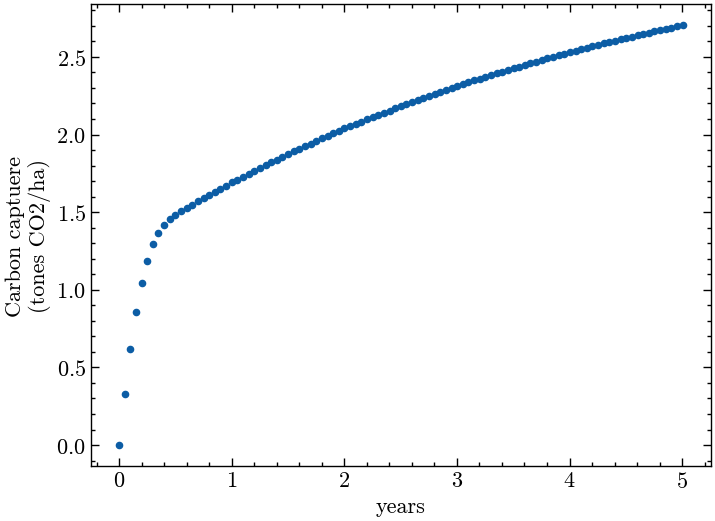

In [9]:
soil_c.plot.scatter(x="years",y="Soil_Calcite",ylabel="Carbon captuere\n(tones CO2/ha)")

In [10]:
# Effluent calcite
# select solution 11, average 11 by years
eff_c = (df[df['soln'] == 11])[["step","years","Calcite"]].groupby('step').mean()
# convert to M (tones CO2/ha)
eff_c['Calcite'] = eff_c['Calcite']*(500000/10)*44/1000000 
# rename
eff_c.rename(columns={"Calcite": "Effluent_Calcite"},inplace = True)

<Axes: xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

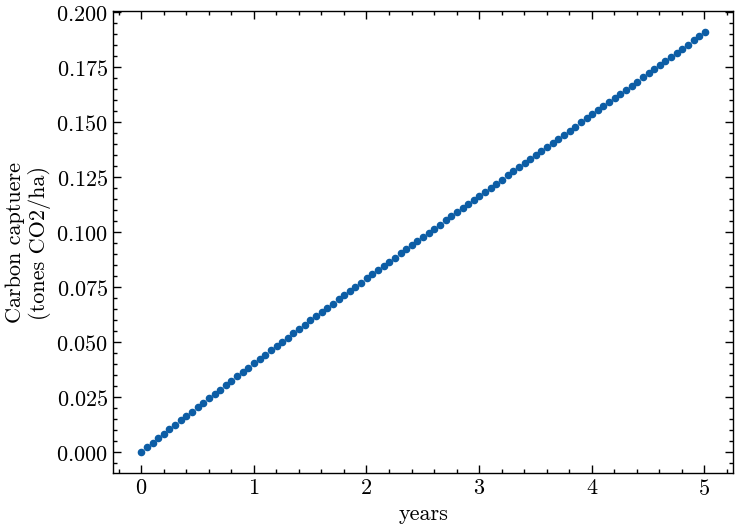

In [11]:
eff_c.plot.scatter(x="years",y="Effluent_Calcite",ylabel="Carbon captuere\n(tones CO2/ha)")

In [12]:
eff_c['Effluent bicarbonate']=eff_c["Effluent_Calcite"].cumsum()

<Axes: xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

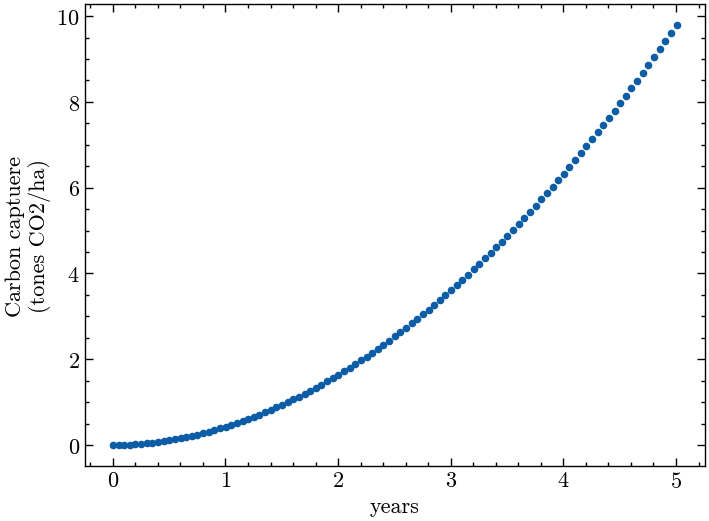

In [13]:
eff_c.plot.scatter(x="years",y=["Effluent bicarbonate"],ylabel="Carbon captuere\n(tones CO2/ha)")

In [14]:
eff_c["Soil_Calcite"]= soil_c["Soil_Calcite"]
eff_c["Total_Capture"] = eff_c['Effluent bicarbonate'] + eff_c["Effluent_Calcite"]+eff_c["Soil_Calcite"]

<Axes: xlabel='years', ylabel='Carbon captuere\n(tones CO2/ha)'>

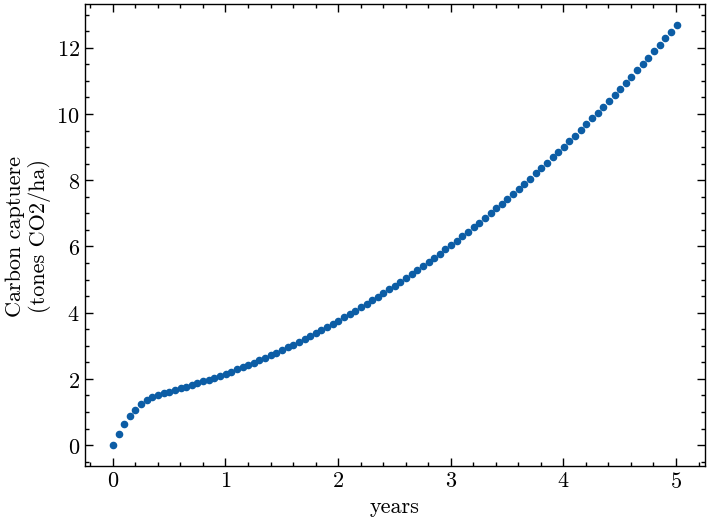

In [15]:
eff_c.plot.scatter(x="years",y=["Total_Capture"],ylabel="Carbon captuere\n(tones CO2/ha)")

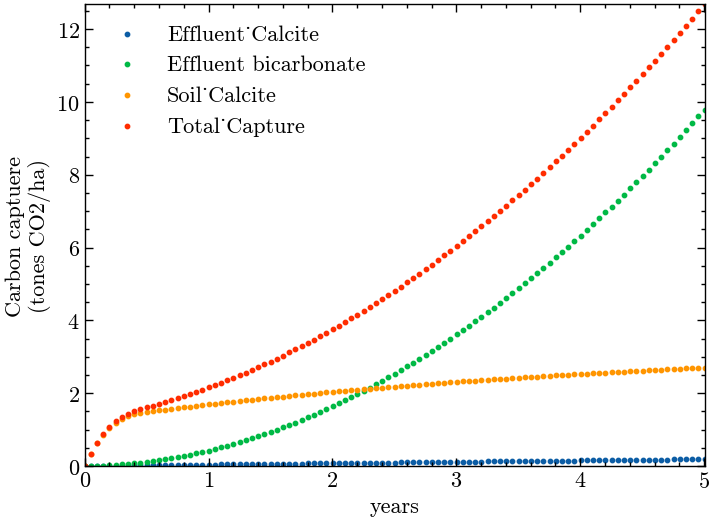

In [16]:
# plot everything together
fig, ax = plt.subplots()
columns = ['Effluent_Calcite','Effluent bicarbonate','Soil_Calcite','Total_Capture']
for column in columns:
    ax.scatter(x = eff_c['years'], y= eff_c[column], label=column,s=10)
ax.set_xlabel('years')
ax.set_ylabel("Carbon captuere\n(tones CO2/ha)")
ax.legend()
ax.autoscale(tight=True)


## Vertical profile in soils
Vertical axis cm. Horizontal axis change concentrations from mol/kgw to mg/L. Choose three time steps. t=0 the baseline. The last time step. One in
middle.   
W should have pH, other parameters. N Na Ca Mg K Al Si Fe Sr Ba P C(4) Hfo_s Hfo_w Calcite Chalcedony Al(OH)3(a)
Fe(OH)3(a) O2(g) CO2(g) Quartz Labradorite Apatite Diopside Forsterite Fayalite Albite Microcline Montmorillonite Glass MikeSorghum

In [17]:
# using Sr to create an example
element = "Sr"
# mol/kgw to mg/L
mol2mg = 87.62*1000

In [18]:
# three times
years = list(df['years'].unique())
year3 = [years[0], years[len(years)//2],years[-1]]

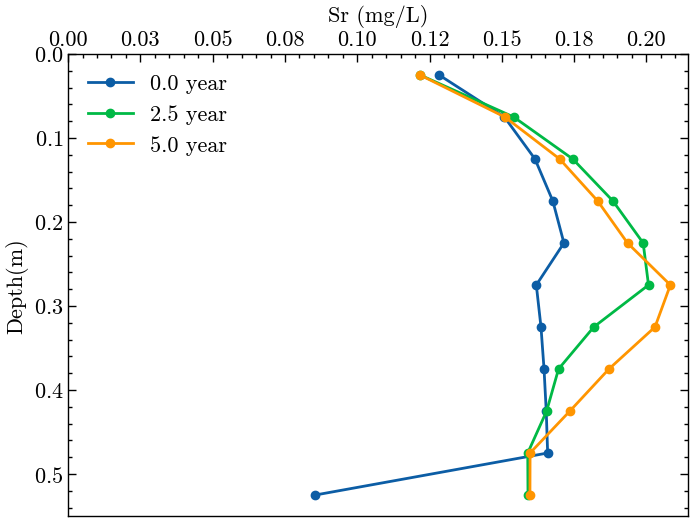

In [19]:
# plot everything together
fig2, ax2 = plt.subplots()
for year in year3:
    df_ele = df[df['years']== year][['dist_x',element]]
    df_ele = df_ele[df_ele['dist_x'] >= 0.0]
    df_ele[element]=df_ele[element] * mol2mg
    ax2.plot(df_ele[element], df_ele['dist_x'], marker='o',label=f'{year:.1f} year')
ax2.set_ylabel("Depth(m)")
ax2.set_title(f'{element} (mg/L)')
ax2.set_xlim(left=0.0)
ax2.xaxis.set_ticks_position('top')
ax2.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax2.invert_yaxis()
ax2.legend()

### Build a widget
A drop-down menu to select an element, then generate a plot

In [24]:
# build parameter list
para_list = ['pH', 'N', 'Na', 'Ca', 'Mg', 'K', 'Al', 'Si', 'Fe', 'Sr', 'Ba', 'P', 'C(4)', 'Hfo_s', 'Hfo_w','Calcite','Al(OH)3(a)', 'Fe(OH)3(a)','O2(g)', 'CO2(g)']
# first find the name begins with "k_"
k_list=[x for x in column_names if x[:2]=="k_"] 
para_list = para_list + k_list

In [31]:
# vertical_profile_plot function
def vertical_profile_plot(para):
    """plot the vertical profile for a given parameter"""
    print(f'Ploting {para}')
    # mol/kgw to mg/L
    mol2mg = 87.62*1000
    # three times
    years = list(df['years'].unique())
    year3 = [years[0], years[len(years)//2],years[-1]]
    # plot everything together
    fig, ax = plt.subplots()
    for year in year3:
        df_ele = df[df['years']== year][['dist_x',para]]
        df_ele = df_ele[df_ele['dist_x'] >= 0.0]
        df_ele[para]=df_ele[para] * mol2mg
        ax.plot(df_ele[para], df_ele['dist_x'], marker='o',label=f'{year:.1f} year')
    ax.set_ylabel("Depth(m)")
    ax.set_title(f'{para} (mg/L)')
    ax.set_xlim(left=0.0)
    ax.xaxis.set_ticks_position('top')
    ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
    ax.invert_yaxis()
    ax.legend()
    plt.show()

In [22]:
import ipywidgets as widgets

In [32]:
# build a widget
para_widget = widgets.Dropdown(options=para_list, description='Select a parameter to plot: ', style= {'description_width': 'initial'})
widgets.interact(vertical_profile_plot, para = para_widget);

interactive(children=(Dropdown(description='Select a parameter to plot: ', options=('pH', 'N', 'Na', 'Ca', 'Mg…